<a href="https://colab.research.google.com/github/anmolag190153/BCS_summer_project_SER/blob/main/Speech_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1='/content/drive/My Drive/Ravdess/Actor_01/03-01-08-02-02-02-01.wav'
ipd.Audio(path1)

In [4]:
actor_1,sr=librosa.load(path1)
print(actor_1.shape)

(72103,)


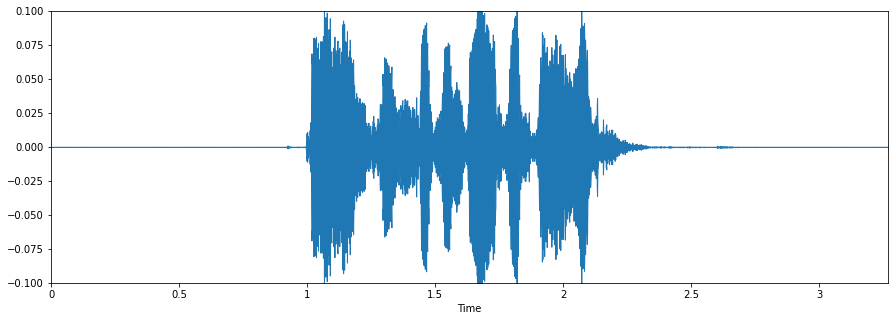

In [5]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(actor_1,sr=sr)
plt.ylim((-0.1,0.1))
plt.show()

In [10]:
path='/content/drive/My Drive/Ravdess'
k=0
x_data=np.ndarray(shape=(24*60,120000))
y_data=np.ndarray(shape=(24*60,1))
for i,actor in enumerate(os.listdir(path)):
    path1=os.path.join(path,actor)
    for j,file in enumerate(os.listdir(path1)):
        b=file[6:8]
        y_data[k,0]=b
        y_data[k,0]=y_data[k,0]-1
        temp_path=os.path.join(path1,file)
        print(temp_path)
        var,_=librosa.load(temp_path)
        x_data[k,:var.shape[0]]=var[:]
        x_data[k,var.shape[0]:]=0
        k=k+1

/content/drive/My Drive/Ravdess/Actor_18/03-01-03-01-02-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-02-01-01-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-04-02-01-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-04-01-02-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-01-01-01-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-04-01-01-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-04-01-02-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-03-01-01-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-02-01-02-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-03-02-02-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-02-02-02-01-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-03-01-01-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-02-01-01-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-03-02-01-02-18.wav
/content/drive/My Drive/Ravdess/Actor_18/03-01-02-02-02-02-18.wav
/content/d

In [11]:
def build_fc_model(input_shape=(180,1), num_class=8):
    
    
    model=tf.keras.models.Sequential([tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(512,activation='relu',input_shape=input_shape),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(128,activation='relu'),
                                    tf.keras.layers.Dense(64,activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')
                                    ])

    return model

In [12]:
def extract_feature(file):
    result=np.array([])
    mfcc=np.mean(librosa.feature.mfcc(file,sr=sr,n_mfcc=40).T,axis=0)
    result=np.hstack((result,mfcc))
    chroma=np.mean(librosa.feature.chroma_stft(file,sr=sr).T,axis=0)
    result=np.hstack((result,chroma))
    mel=np.mean(librosa.feature.melspectrogram(file,sr=sr).T,axis=0)
    result=np.hstack((result,mel))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(file, sr=sr).T,axis=0)
    result=np.hstack((result,spectral_rolloff))
    return result

In [13]:
x=[]
for i in range(24*60):
    feature=extract_feature(x_data[i,:])
    x.append(feature)
x_train, x_test,y_train,y_test = train_test_split(np.array(x), y_data, test_size=0.2, random_state=9)

In [14]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
model=build_fc_model()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=1000,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/1000
5/5 [==============================] - 1s 56ms/step - loss: 1.9870 - accuracy: 0.2083 - val_loss: 1.8627 - val_accuracy: 0.2743
Epoch 2/1000
5/5 [==============================] - 0s 24ms/step - loss: 1.8419 - accuracy: 0.2708 - val_loss: 1.8204 - val_accuracy: 0.3021
Epoch 3/1000
5/5 [==============================] - 0s 20ms/step - loss: 1.7340 - accuracy: 0.3281 - val_loss: 1.7196 - val_accuracy: 0.3125
Epoch 4/1000
5/5 [==============================] - 0s 19ms/step - loss: 1.6704 - accuracy: 0.3394 - val_loss: 1.6683 - val_accuracy: 0.3611
Epoch 5/1000
5/5 [==============================] - 0s 20ms/step - loss: 1.6210 - accuracy: 0.3785 - val_loss: 1.5966 - val_accuracy: 0.4062
Epoch 6/1000
5/5 [==============================] - 0s 21ms/step - loss: 1.5638 - accuracy: 0.4036 - val_loss: 1.5643 - val_accuracy: 0.4271
Epoch 7/1000
5/5 [==============================] - 0s 20ms/step - loss: 1.5078 - accuracy: 0.4280 - val_loss: 1.5179 - val_accuracy: 0.4306
Epoch 8/1000
